(schelling)=
```{raw} html
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

# Schelling's Segregation Model

```{index} single: Schelling Segregation Model
```

```{index} single: Models; Schelling's Segregation Model
```

```{contents} Contents
:depth: 2
```

## Outline

In 1969, Thomas C. Schelling developed a simple but striking model of racial segregation {cite}`Schelling1969`.

His model studies the dynamics of racially mixed neighborhoods.

Like much of Schelling's work, the model shows how local interactions can lead to surprising aggregate structure.

In particular, it shows that relatively mild preference for neighbors of similar race can lead in aggregate to the collapse of mixed neighborhoods, and high levels of segregation.

In recognition of this and other research, Schelling was awarded the 2005 Nobel Prize in Economic Sciences (joint with Robert Aumann).

In this lecture, we (in fact you) will build and run a version of Schelling's model.

Let's start with some imports:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
from random import uniform, seed
from math import sqrt

## The Model

We will cover a variation of Schelling's model that is easy to program and captures the main idea.

### Set-Up

Suppose we have two types of people: orange people and green people.

For the purpose of this lecture, we will assume there are 250 of each type.

These agents all live on a single unit square.

The location of an agent is just a point $(x, y)$,  where $0 < x, y < 1$.

### Preferences

We will say that an agent is *happy* if half or more of her 10 nearest neighbors are of the same type.

Here 'nearest' is in terms of [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance).

An agent who is not happy is called *unhappy*.

An important point here is that agents are not averse to living in mixed areas.

They are perfectly happy if half their neighbors are of the other color.

### Behavior

Initially, agents are mixed together (integrated).

In particular, the initial location of each agent is an independent draw from a bivariate uniform distribution on $S = (0, 1)^2$.

Now, cycling through the set of all agents, each agent is now given the chance to stay or move.

We assume that each agent will stay put if they are happy and move if unhappy.

The algorithm for moving is as follows

1. Draw a random location in $S$
1. If happy at new location, move there
1. Else, go to step 1

In this way, we cycle continuously through the agents, moving as required.

We continue to cycle until no one wishes to move.

## Results

Let's have a look at the results we got when we coded and ran this model.

As discussed above, agents are initially mixed randomly together.

```{figure} /_static/lecture_specific/schelling/schelling_fig1.png

```

But after several cycles, they become segregated into distinct regions.

```{figure} /_static/lecture_specific/schelling/schelling_fig2.png

```

```{figure} /_static/lecture_specific/schelling/schelling_fig3.png

```

```{figure} /_static/lecture_specific/schelling/schelling_fig4.png

```

In this instance, the program terminated after 4 cycles through the set of
agents, indicating that all agents had reached a state of happiness.

What is striking about the pictures is how rapidly racial integration breaks down.

This is despite the fact that people in the model don't actually mind living mixed with the other type.

Even with these preferences, the outcome is a high degree of segregation.

## Exercises

```{exercise-start}
:label: schelling_ex1
```

Implement and run this simulation for yourself.

Consider the following structure for your program.

Agents can be modeled as [objects](https://python-programming.quantecon.org/python_oop.html).

Here's an indication of how they might look

```{code-block} none
* Data:

    * type (green or orange)
    * location

* Methods:

    * determine whether happy or not given locations of other agents

    * If not happy, move

        * find a new location where happy
```

And here's some pseudocode for the main loop

```{code-block} none
while agents are still moving
    for agent in agents
        give agent the opportunity to move
```

Use 250 agents of each type.

```{exercise-end}
```

## Solutions

```{solution-start} schelling_ex1
:class: dropdown
```

Here's one solution that does the job we want.

If you feel like a further exercise, you can probably speed up some of the computations and
then increase the number of agents.

Entering loop  1


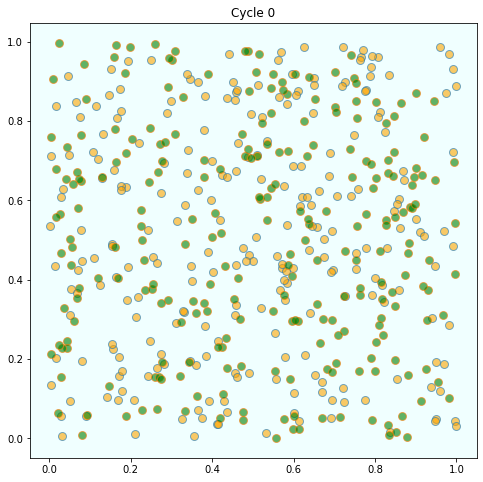

Entering loop  2


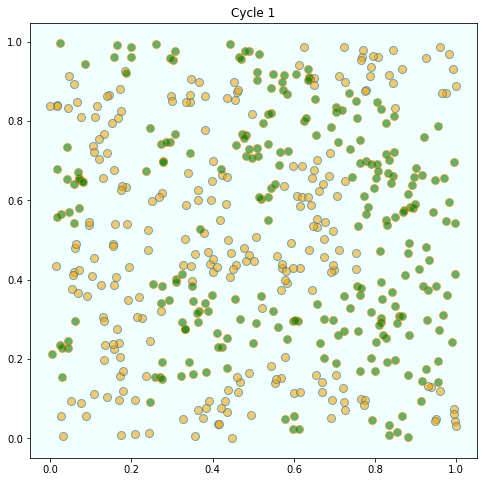

Entering loop  3


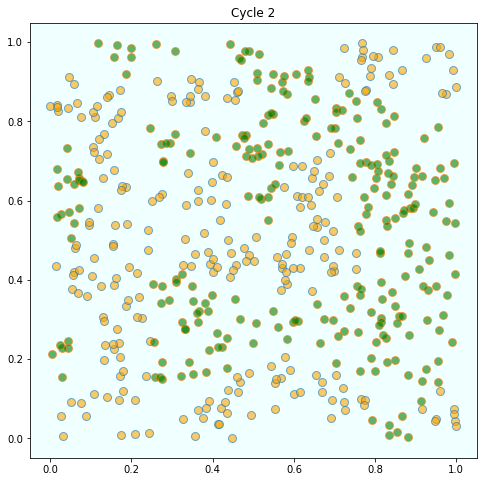

Entering loop  4


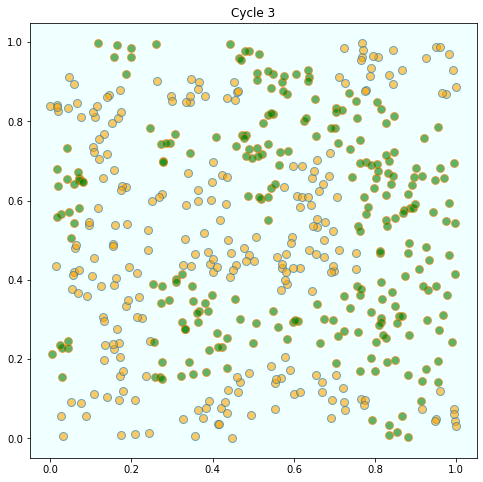

Converged, terminating.


In [2]:
seed(10)  # For reproducible random numbers

class Agent:

    def __init__(self, type):
        self.type = type
        self.draw_location()

    def draw_location(self):
        self.location = uniform(0, 1), uniform(0, 1)

    def get_distance(self, other):
        "Computes the euclidean distance between self and other agent."
        a = (self.location[0] - other.location[0])**2
        b = (self.location[1] - other.location[1])**2
        return sqrt(a + b)

    def happy(self, agents):
        "True if sufficient number of nearest neighbors are of the same type."
        distances = []
        # distances is a list of pairs (d, agent), where d is distance from
        # agent to self
        for agent in agents:
            if self != agent:
                distance = self.get_distance(agent)
                distances.append((distance, agent))
        # == Sort from smallest to largest, according to distance == #
        distances.sort()
        # == Extract the neighboring agents == #
        neighbors = [agent for d, agent in distances[:num_neighbors]]
        # == Count how many neighbors have the same type as self == #
        num_same_type = sum(self.type == agent.type for agent in neighbors)
        return num_same_type >= require_same_type

    def update(self, agents):
        "If not happy, then randomly choose new locations until happy."
        while not self.happy(agents):
            self.draw_location()


def plot_distribution(agents, cycle_num):
    "Plot the distribution of agents after cycle_num rounds of the loop."
    x_values_0, y_values_0 = [], []
    x_values_1, y_values_1 = [], []
    # == Obtain locations of each type == #
    for agent in agents:
        x, y = agent.location
        if agent.type == 0:
            x_values_0.append(x)
            y_values_0.append(y)
        else:
            x_values_1.append(x)
            y_values_1.append(y)
    fig, ax = plt.subplots(figsize=(8, 8))
    plot_args = {'markersize': 8, 'alpha': 0.6}
    ax.set_facecolor('azure')
    ax.plot(x_values_0, y_values_0, 'o', markerfacecolor='orange', **plot_args)
    ax.plot(x_values_1, y_values_1, 'o', markerfacecolor='green', **plot_args)
    ax.set_title(f'Cycle {cycle_num-1}')
    plt.show()

# == Main == #

num_of_type_0 = 250
num_of_type_1 = 250
num_neighbors = 10      # Number of agents regarded as neighbors
require_same_type = 5   # Want at least this many neighbors to be same type

# == Create a list of agents == #
agents = [Agent(0) for i in range(num_of_type_0)]
agents.extend(Agent(1) for i in range(num_of_type_1))


count = 1
# ==  Loop until none wishes to move == #
while True:
    print('Entering loop ', count)
    plot_distribution(agents, count)
    count += 1
    no_one_moved = True
    for agent in agents:
        old_location = agent.location
        agent.update(agents)
        if agent.location != old_location:
            no_one_moved = False
    if no_one_moved:
        break

print('Converged, terminating.')

```{solution-end}
```